In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


random_seed = 42
seed_everything(random_seed) # Seed 고정
plt.rc('font', family='NanumGothicCoding')

In [5]:
train = pd.read_csv('/content/drive/MyDrive/고객 대출등급 분류 해커톤/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/고객 대출등급 분류 해커톤/data/test.csv')

## **EDA**

In [6]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [7]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [8]:
train.dtypes

ID               object
대출금액              int64
대출기간             object
근로기간             object
주택소유상태           object
연간소득              int64
부채_대비_소득_비율     float64
총계좌수              int64
대출목적             object
최근_2년간_연체_횟수      int64
총상환원금             int64
총상환이자           float64
총연체금액           float64
연체계좌수           float64
대출등급             object
dtype: object

In [9]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


#### 정답 레이블 분포 확인

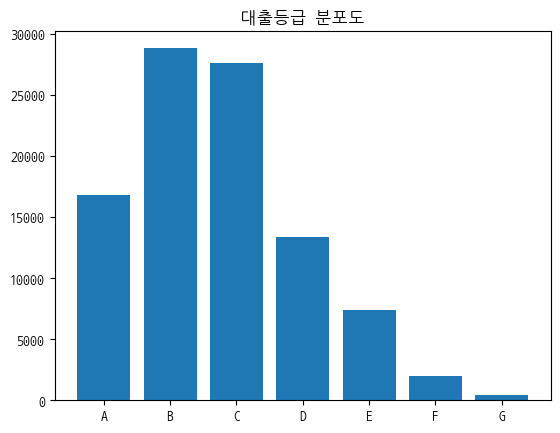

In [10]:
y_counts = train['대출등급'].value_counts().sort_index()

plt.title('대출등급 분포도')
plt.bar(np.arange(len(y_counts)), y_counts.values)
plt.xticks(np.arange(len(y_counts)), y_counts.index)
plt.show()

In [11]:
print("대출등급 비율\n", y_counts/len(train)*100, sep='')

대출등급 비율
A    17.417492
B    29.926060
C    28.686107
D    13.867946
E     7.637028
F     2.029202
G     0.436164
Name: 대출등급, dtype: float64


#### 수치형 데이터

In [12]:
rank_to_num = dict({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})
train['대출등급_수치']=train.대출등급.replace(rank_to_num)

In [13]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,대출등급_수치
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,2
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,2
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,2
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,4
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,0
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,3


In [67]:
train.corr()

<ipython-input-67-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급_수치,근로기간_수치
대출금액,1.000000,0.273982,0.002264,0.212325,-0.014766,0.379091,0.615721,0.011854,0.000183,0.137047,0.047267
연간소득,0.273982,1.000000,-0.044594,0.145403,0.040260,0.137553,0.114312,0.000333,0.009854,-0.083666,0.025190
부채_대비_소득_비율,0.002264,-0.044594,1.000000,0.058830,0.000699,-0.016180,0.018565,0.000711,0.000051,0.054121,0.018396
총계좌수,0.212325,0.145403,0.058830,1.000000,0.112090,0.083612,0.116295,0.000037,0.023651,-0.039990,0.076790
최근_2년간_연체_횟수,-0.014766,0.040260,0.000699,0.112090,1.000000,-0.010051,0.008091,0.004612,0.133632,0.039787,0.011050
총상환원금,0.379091,0.137553,-0.016180,0.083612,-0.010051,1.000000,0.412380,0.015379,-0.005191,-0.101513,0.010401
총상환이자,0.615721,0.114312,0.018565,0.116295,0.008091,0.412380,1.000000,0.057838,0.009256,0.444249,0.027482
총연체금액,0.011854,0.000333,0.000711,0.000037,0.004612,0.015379,0.057838,1.000000,0.006620,0.028664,0.002271
연체계좌수,0.000183,0.009854,0.000051,0.023651,0.133632,-0.005191,0.009256,0.006620,1.000000,0.025681,0.000045
대출등급_수치,0.137047,-0.083666,0.054121,-0.039990,0.039787,-0.101513,0.444249,0.028664,0.025681,1.000000,-0.017832


In [15]:
train[train['대출등급']=='A'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,1.790579e+07,1.124911e+08,16.547850,26.910684,0.218698,1.066966e+06,2.240085e+05,14.806105,0.001133
std,9.294000e+06,1.396115e+08,7.558913,11.788615,0.704163,1.076776e+06,1.835086e+05,704.850463,0.033640
min,1.200000e+06,1.142400e+07,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.080000e+07,6.720000e+07,10.820000,18.000000,0.000000,4.448040e+05,9.140100e+04,0.000000,0.000000
50%,1.680000e+07,9.600000e+07,16.130000,25.000000,0.000000,8.302800e+05,1.756320e+05,0.000000,0.000000
75%,2.400000e+07,1.320000e+08,21.870000,34.000000,0.000000,1.441248e+06,3.066780e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,39.800000,96.000000,18.000000,3.368399e+07,1.315908e+06,46536.000000,1.000000


In [16]:
train[train['대출등급']=='B'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,1.686808e+07,9.570640e+07,18.129529,25.223375,0.365409,8.340144e+05,3.033410e+05,29.441371,0.004789
std,9.772310e+06,1.160385e+08,8.191684,11.765557,0.947582,9.403085e+05,2.689123e+05,983.715162,0.071019
min,1.200000e+06,9.600000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.600000e+06,5.838600e+07,11.930000,17.000000,0.000000,3.183360e+05,1.106520e+05,0.000000,0.000000
50%,1.440000e+07,8.160000e+07,17.600000,24.000000,0.000000,6.065640e+05,2.222280e+05,0.000000,0.000000
75%,2.400000e+07,1.140000e+08,23.980000,32.000000,0.000000,1.101888e+06,4.210080e+05,0.000000,0.000000
max,4.200000e+07,1.044000e+10,41.690000,140.000000,16.000000,3.672116e+07,2.538084e+06,75216.000000,2.000000


In [17]:
train[train['대출등급']=='C'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,1.789004e+07,8.903804e+07,20.270095,24.695073,0.380299,7.521078e+05,4.306745e+05,48.052565,0.007892
std,1.052509e+07,7.227919e+07,60.681872,12.195646,0.966606,9.753910e+05,3.774689e+05,1258.793440,0.094808
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.600000e+06,5.400000e+07,13.300000,16.000000,0.000000,2.786160e+05,1.545600e+05,0.000000,0.000000
50%,1.584000e+07,7.560000e+07,19.510000,23.000000,0.000000,5.521320e+05,3.230280e+05,0.000000,0.000000
75%,2.400000e+07,1.080000e+08,26.305000,31.000000,0.000000,9.636720e+05,6.070920e+05,0.000000,0.000000
max,4.200000e+07,5.576640e+09,9999.000000,151.000000,30.000000,4.195594e+07,2.671956e+06,72444.000000,4.000000


In [18]:
train[train['대출등급']=='D'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,1.953331e+07,8.359673e+07,21.808465,24.705107,0.384379,7.297173e+05,6.117896e+05,113.352104,0.008462
std,1.097276e+07,6.622318e+07,13.166067,12.357153,0.970777,1.018910e+06,5.200560e+05,2127.823877,0.096382
min,1.200000e+06,2.124000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.173000e+07,5.145480e+07,14.690000,16.000000,0.000000,2.679480e+05,2.208750e+05,0.000000,0.000000
50%,1.800000e+07,7.200000e+07,21.610000,23.000000,0.000000,5.286000e+05,4.746840e+05,0.000000,0.000000
75%,2.688000e+07,1.008000e+08,29.157500,31.000000,0.000000,9.087840e+05,8.845320e+05,0.000000,0.000000
max,4.200000e+07,3.600000e+09,1092.520000,169.000000,16.000000,3.979390e+07,4.048740e+06,75768.000000,2.000000


In [19]:
train[train['대출등급']=='E'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,2.232013e+07,8.492864e+07,22.248466,25.320642,0.349334,7.074507e+05,8.146975e+05,94.572206,0.007615
std,1.077465e+07,5.582495e+07,11.977395,12.522195,0.914513,1.238723e+06,6.276712e+05,1678.616326,0.091509
min,1.200000e+06,1.440000e+06,0.160000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.434000e+07,5.400000e+07,15.350000,16.000000,0.000000,2.886720e+05,3.388860e+05,0.000000,0.000000
50%,2.100000e+07,7.320000e+07,21.925000,23.000000,0.000000,5.239080e+05,6.530040e+05,0.000000,0.000000
75%,3.000000e+07,1.020000e+08,29.287500,32.000000,0.000000,8.728020e+05,1.168896e+06,0.000000,0.000000
max,4.200000e+07,1.800000e+09,672.520000,109.000000,18.000000,3.555000e+07,3.942252e+06,44688.000000,2.000000


In [20]:
train[train['대출등급']=='F'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,2.400517e+07,8.434506e+07,21.853710,25.543501,0.361822,6.673177e+05,1.095274e+06,237.801433,0.006653
std,1.061245e+07,4.500624e+07,8.913153,12.950036,0.914466,1.368616e+06,8.197040e+05,3437.789928,0.087385
min,1.200000e+06,1.062720e+07,0.660000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.548000e+07,5.400000e+07,15.392500,17.000000,0.000000,2.670300e+05,4.708830e+05,0.000000,0.000000
50%,2.304000e+07,7.543080e+07,22.125000,23.000000,0.000000,4.902240e+05,9.009300e+05,0.000000,0.000000
75%,3.242250e+07,1.020000e+08,28.337500,32.000000,0.000000,7.949400e+05,1.548396e+06,0.000000,0.000000
max,4.200000e+07,6.000000e+08,54.360000,98.000000,10.000000,3.091129e+07,5.653416e+06,74076.000000,2.000000


In [21]:
train[train['대출등급']=='G'].describe().drop('count').drop('대출등급_수치',axis=1)

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
mean,2.402079e+07,8.258034e+07,20.691952,24.550000,0.416667,5.870190e+05,1.284655e+06,329.942857,0.004762
std,1.080393e+07,5.407082e+07,8.718104,12.482346,1.239835,8.149610e+05,9.529551e+05,4448.705070,0.068924
min,2.310000e+06,1.055520e+07,0.820000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.512000e+07,5.040000e+07,14.352500,15.000000,0.000000,2.292960e+05,5.494050e+05,0.000000,0.000000
50%,2.244000e+07,7.080000e+07,21.095000,23.000000,0.000000,4.421880e+05,1.089972e+06,0.000000,0.000000
75%,3.360000e+07,9.600000e+07,26.535000,32.000000,0.000000,7.647450e+05,1.844562e+06,0.000000,0.000000
max,4.200000e+07,4.344000e+08,47.610000,76.000000,17.000000,1.293742e+07,4.464612e+06,72864.000000,1.000000


#### 범주형 데이터

In [22]:
train['주택소유상태'].value_counts()

MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64

In [23]:
train['대출목적'].value_counts()

부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64

In [24]:
loan_purpose = dict()

for purpose in set(train['대출목적']).union(set(test['대출목적'])):
  if purpose == '부채 통합':
    loan_purpose[purpose] = '부채 통합'
  elif purpose == '신용 카드':
    loan_purpose[purpose] = '신용 카드'
  elif purpose == '주택 개선':
    loan_purpose[purpose] = '주택 개선'
  else:
    loan_purpose[purpose] = '그외'

train['대출목적_통합'] = train['대출목적'].replace(loan_purpose)
test['대출목적_통합'] = test['대출목적'].replace(loan_purpose)

In [25]:
train['근로기간'].value_counts()

10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

In [26]:
train.loc[train['근로기간']=='< 1 year','근로기간'] = '0 year'
train.loc[train['근로기간']=='<1 year','근로기간'] = '0 year'
train.loc[train['근로기간']=='1 years','근로기간'] = '1 year'
train.loc[train['근로기간']=='3','근로기간'] = '3 years'
train.loc[train['근로기간']=='10+ years','근로기간'] = '10 years'
train.loc[train['근로기간']=='10+years','근로기간'] = '10 years'
test.loc[test['근로기간']=='< 1 year','근로기간'] = '0 year'
test.loc[test['근로기간']=='<1 year','근로기간'] = '0 year'
test.loc[test['근로기간']=='1 years','근로기간'] = '1 year'
test.loc[test['근로기간']=='3','근로기간'] = '3 years'
test.loc[test['근로기간']=='10+ years','근로기간'] = '10 years'
test.loc[test['근로기간']=='10+years','근로기간'] = '10 years'

In [27]:
work_period_dic = {'0 year':0,'1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10 years': 10, 'Unknown': 11}
train['근로기간_수치'] = train['근로기간'].replace(work_period_dic)

In [28]:
train['근로기간'].value_counts()

10 years    32481
2 years      8450
0 year       8144
3 years      7670
1 year       6305
Unknown      5671
5 years      5665
4 years      5588
8 years      4888
6 years      3874
7 years      3814
9 years      3744
Name: 근로기간, dtype: int64

Text(0.5, 1.0, '근로기간 분포')

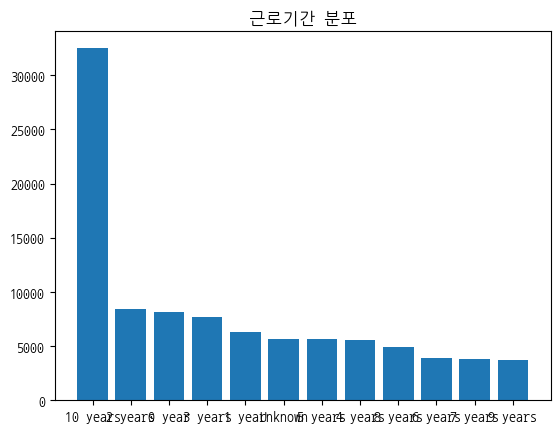

In [29]:
period_counts = train['근로기간'].value_counts()
plt.bar(np.arange(len(period_counts)), period_counts.values)
plt.xticks(np.arange(len(period_counts)), period_counts.index)
plt.title('근로기간 분포')

In [30]:
train = train.drop(train[train.주택소유상태=='ANY'].index)

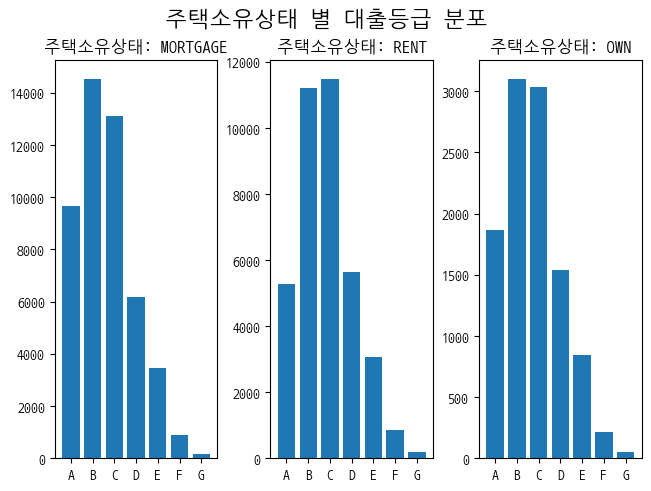

In [31]:
fig, axs = plt.subplots(1,3,constrained_layout=True)
fig.suptitle('주택소유상태 별 대출등급 분포', fontsize=16)
for i, house_own_type in enumerate(['MORTGAGE', 'RENT', 'OWN']):
  y_counts = train[train['주택소유상태'] == house_own_type]['대출등급'].value_counts().sort_index()
  axs[i].bar(np.arange(len(y_counts)), y_counts.values),
  axs[i].set_title('주택소유상태: %s' %house_own_type, fontsize=12),
  axs[i].set_xticks(np.arange(len(y_counts)), y_counts.index)
plt.show()

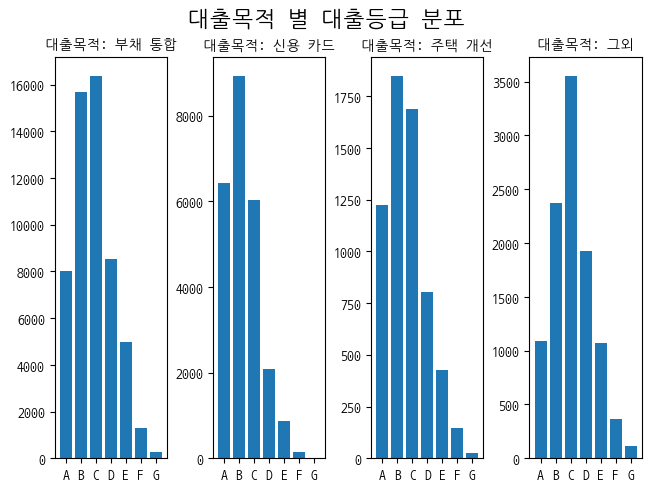

In [32]:
fig, axs = plt.subplots(1,4,constrained_layout=True)
fig.suptitle('대출목적 별 대출등급 분포', fontsize=16)
for i, purpose in enumerate(['부채 통합', '신용 카드', '주택 개선', '그외']):
  y_counts = train[train['대출목적_통합'] == purpose]['대출등급'].value_counts().sort_index()
  axs[i].bar(np.arange(len(y_counts)), y_counts.values),
  axs[i].set_title('대출목적: %s' %purpose, fontsize=10),
  axs[i].set_xticks(np.arange(len(y_counts)), y_counts.index)
plt.show()

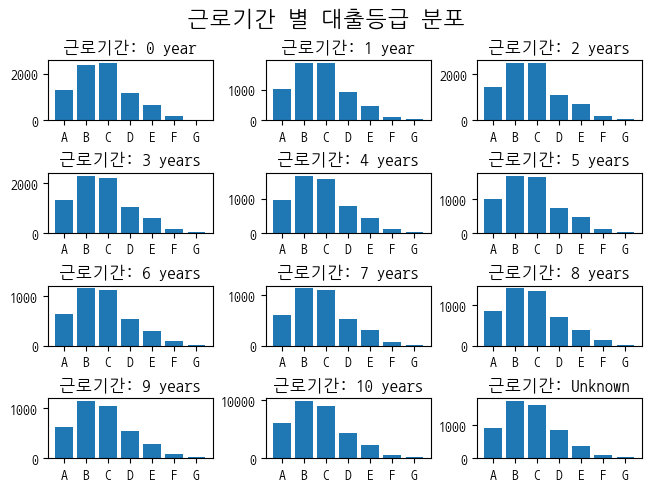

In [33]:
fig, axs = plt.subplots(4,3,constrained_layout=True)
fig.suptitle('근로기간 별 대출등급 분포', fontsize=16)
for i, period in enumerate(['0 year','1 year','2 years','3 years','4 years','5 years', '6 years', '7 years', '8 years', '9 years', '10 years', 'Unknown']):
  y_counts = train[train['근로기간'] == period]['대출등급'].value_counts().sort_index()
  axs[i//3][i%3].bar(np.arange(len(y_counts)), y_counts.values),
  axs[i//3][i%3].set_title('근로기간: %s' %period, fontsize=12),
  axs[i//3][i%3].set_xticks(np.arange(len(y_counts)), y_counts.index)
plt.show()

In [34]:
train['대출기간'].value_counts()

 36 months    64478
 60 months    31815
Name: 대출기간, dtype: int64

In [35]:
train.loc[train['대출기간'] == ' 36 months','대출기간'] = '36 months'
train.loc[train['대출기간'] == ' 60 months','대출기간'] = '60 months'
test.loc[test['대출기간'] == ' 36 months','대출기간'] = '36 months'
test.loc[test['대출기간'] == ' 60 months','대출기간'] = '60 months'

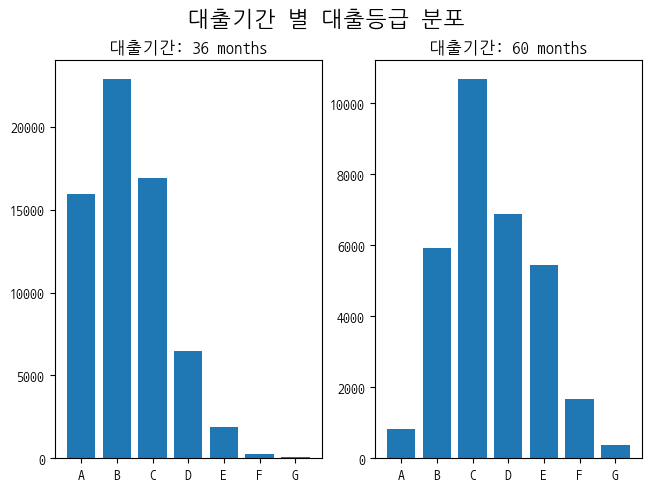

In [36]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('대출기간 별 대출등급 분포', fontsize=16)
for i, period in enumerate(['36 months','60 months']):
  y_counts = train[train['대출기간'] == period]['대출등급'].value_counts().sort_index()
  axs[i].bar(np.arange(len(y_counts)), y_counts.values),
  axs[i].set_title('대출기간: %s' %period, fontsize=12),
  axs[i].set_xticks(np.arange(len(y_counts)), y_counts.index)
plt.show()

In [37]:
print('부채 대비 소득 비율 40 이상 데이터 개수: ', len(train[train['부채_대비_소득_비율']>=40]))
print('부채 대비 소득 비율 40 미만 데이터 개수: ',len(train[train['부채_대비_소득_비율']<40]), end='\n\n')

부채 대비 소득 비율 40 이상 데이터 개수:  43
부채 대비 소득 비율 40 미만 데이터 개수:  96250



Text(0.5, 1.0, '부채 대비 소득 비율 분포')

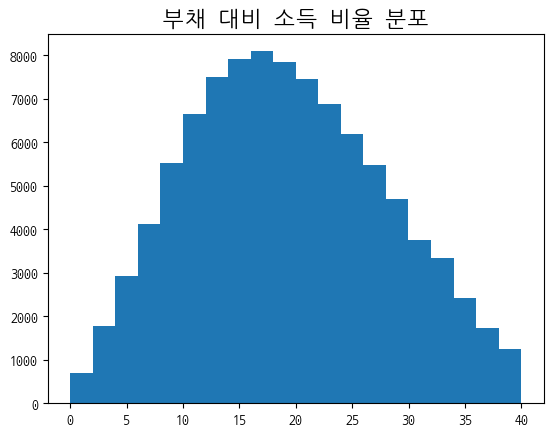

In [38]:
plt.hist(train[train['부채_대비_소득_비율']<40]['부채_대비_소득_비율'], bins=20)
plt.title('부채 대비 소득 비율 분포', fontsize=16)

In [39]:
train['부채_대비_소득_비율_구간']=pd.cut(train.부채_대비_소득_비율,
                               bins=[0,5,10,15,20,25,30,35,40,100000],
                               labels=['0이상 5미만','5이상 10미만','10이상 15미만','15이상 20미만','20이상 25미만','25이상 30미만', '30이상 35미만','35이상 40미만','40이상'])

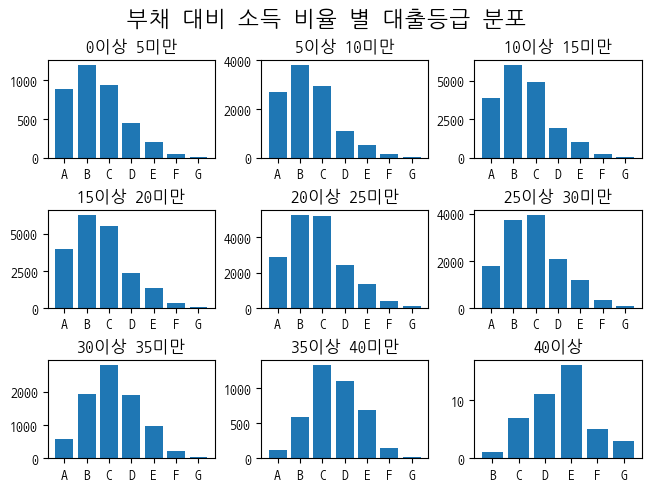

In [40]:
fig, axs = plt.subplots(3,3,constrained_layout=True)
fig.suptitle('부채 대비 소득 비율 별 대출등급 분포', fontsize=16)
intervals = ['0이상 5미만','5이상 10미만','10이상 15미만','15이상 20미만','20이상 25미만','25이상 30미만', '30이상 35미만','35이상 40미만','40이상']
for i, interval in enumerate(intervals):
  y_counts = train[train['부채_대비_소득_비율_구간'] == interval]['대출등급'].value_counts().sort_index()
  axs[i//3][i%3].bar(np.arange(len(y_counts)), y_counts.values),
  axs[i//3][i%3].set_title('%s' %interval, fontsize=12),
  axs[i//3][i%3].set_xticks(np.arange(len(y_counts)), y_counts.index)
plt.show()

In [41]:
temp = train[train['대출기간']=='36 months']['근로기간'].value_counts()
period_36months = {idx:val for idx, val in zip(temp.index, temp.values)}
period_36months

temp = train[train['대출기간']=='60 months']['근로기간'].value_counts()
period_60months = {idx:val for idx, val in zip(temp.index, temp.values)}
period_60months

sorted_period = ['0 year','1 year','2 years','3 years','4 years','5 years', '6 years', '7 years', '8 years', '9 years', '10 years', 'Unknown']
p36 = []
p60 = []
for period in sorted_period:
  p36.append(period_36months[period]/sum(period_36months.values()))

for period in sorted_period:
  p60.append(period_60months[period]/sum(period_60months.values()))

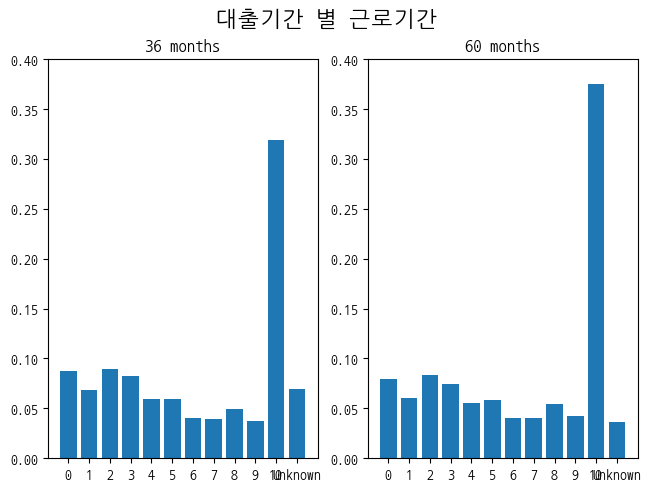

In [42]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('대출기간 별 근로기간', fontsize=16)
sorted_period = [0,1,2,3,4,5,6,7,8,9,10,'Unknown']

axs[0].bar(np.arange(len(sorted_period)), p36),
axs[0].set_ylim([0,0.4]),
axs[0].set_title('36 months', fontsize=12),
axs[0].set_xticks(np.arange(len(sorted_period)), sorted_period)
axs[1].bar(np.arange(len(sorted_period)), p60),
axs[1].set_ylim([0,0.4]),
axs[1].set_title('60 months', fontsize=12),
axs[1].set_xticks(np.arange(len(sorted_period)), sorted_period)
plt.show()

In [43]:
train['총계좌수_구간']=pd.cut(train.총계좌수,
                               bins=[0,10,20,30,40,50,75,100,200],
                               labels=['0이상 10미만','10이상 20미만','20이상 30미만','30이상 40미만','40이상 50미만','50이상 75미만','75이상 100미만','100이상'])

In [44]:
print(train['총계좌수_구간'].value_counts().sort_index())

0이상 10미만       7688
10이상 20미만     29818
20이상 30미만     31131
30이상 40미만     17204
40이상 50미만      7080
50이상 75미만      3165
75이상 100미만      191
100이상            16
Name: 총계좌수_구간, dtype: int64


Text(0.5, 1.0, '총계좌수 분포')

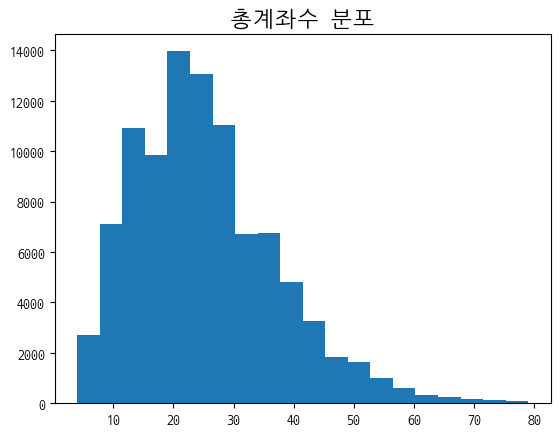

In [45]:
plt.hist(train[train['총계좌수']<80]['총계좌수'], bins=20)
plt.title('총계좌수 분포', fontsize=16)

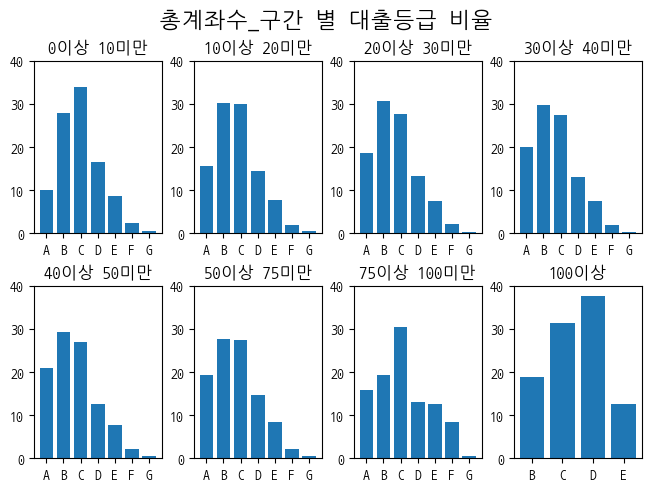

In [46]:
fig, axs = plt.subplots(2,4,constrained_layout=True)
fig.suptitle('총계좌수_구간 별 대출등급 비율', fontsize=16)
labels=['0이상 10미만','10이상 20미만','20이상 30미만','30이상 40미만','40이상 50미만','50이상 75미만','75이상 100미만','100이상']
for i, label in enumerate(labels):
  y_proportion = train[train['총계좌수_구간'] == label]['대출등급'].value_counts().sort_index()/len(train[train['총계좌수_구간'] == label]['총계좌수_구간'])*100
  axs[i//4][i%4].bar(np.arange(len(y_proportion)), y_proportion.values),
  axs[i//4][i%4].set_ylim([0,40]),
  axs[i//4][i%4].set_title('%s' %label, fontsize=12),
  axs[i//4][i%4].set_xticks(np.arange(len(y_proportion)), y_proportion.index)
plt.show()

In [47]:
temp = train[train['대출기간']=='36 months']['주택소유상태'].value_counts()
home_36months = {idx:val for idx, val in zip(temp.index, temp.values)}

temp = train[train['대출기간']=='60 months']['주택소유상태'].value_counts()
home_60months = {idx:val for idx, val in zip(temp.index, temp.values)}

home_ = ['0 year','1 year','2 years','3 years','4 years','5 years', '6 years', '7 years', '8 years', '9 years', '10 years', 'Unknown']
h36 = []
h60 = []
for home in ['MORTGAGE','RENT','OWN']:
  h36.append(home_36months[home]/sum(home_36months.values()))
  h60.append(home_60months[home]/sum(home_60months.values()))

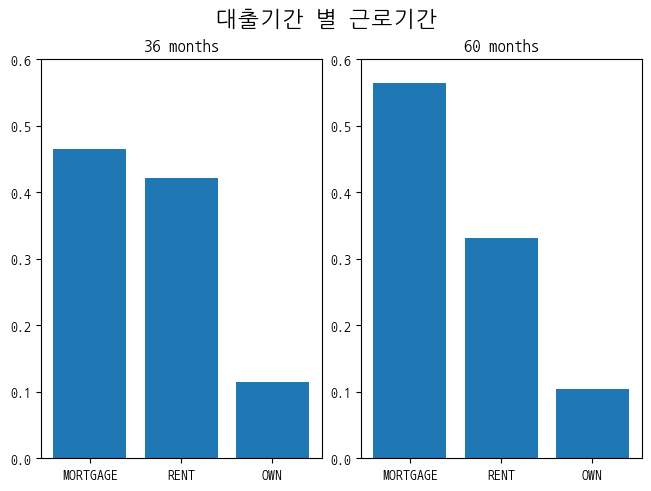

In [48]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('대출기간 별 근로기간', fontsize=16)
sorted_period = [0,1,2,3,4,5,6,7,8,9,10,'Unknown']

axs[0].bar(np.arange(3), h36),
axs[0].set_ylim([0,0.6]),
axs[0].set_title('36 months', fontsize=12),
axs[0].set_xticks(np.arange(3), ['MORTGAGE','RENT','OWN'])
axs[1].bar(np.arange(3), h60),
axs[1].set_ylim([0,0.6]),
axs[1].set_title('60 months', fontsize=12),
axs[1].set_xticks(np.arange(3), ['MORTGAGE','RENT','OWN'])
plt.show()

In [49]:
temp = train[train['대출기간']=='36 months']['대출목적_통합'].value_counts()
purpose_36months = {idx:val for idx, val in zip(temp.index, temp.values)}

temp = train[train['대출기간']=='60 months']['대출목적_통합'].value_counts()
purpose_60months = {idx:val for idx, val in zip(temp.index, temp.values)}

purposes = ['부채 통합','신용 카드','주택 개선','그외']
p36 = []
p60 = []
for purpose in purposes:
  p36.append(purpose_36months[purpose]/sum(purpose_36months.values()))
  p60.append(purpose_60months[purpose]/sum(purpose_60months.values()))

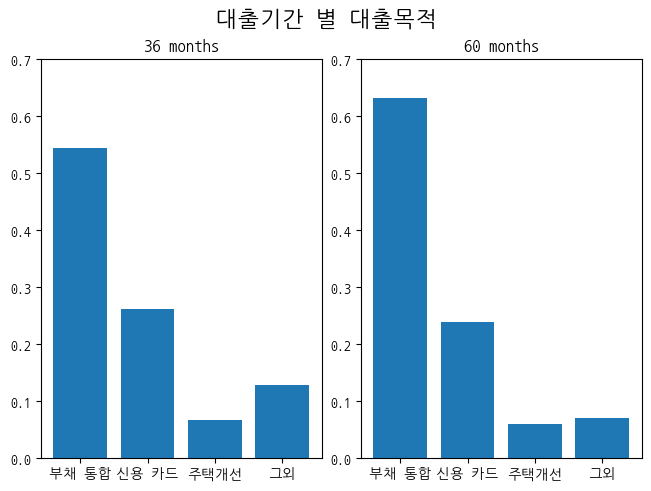

In [50]:
fig, axs = plt.subplots(1,2,constrained_layout=True)
fig.suptitle('대출기간 별 대출목적', fontsize=16)
purposes = ['부채 통합','신용 카드','주택개선','그외']

axs[0].bar(np.arange(4), p36),
axs[0].set_ylim([0,0.7]),
axs[0].set_title('36 months', fontsize=12),
axs[0].set_xticks(np.arange(4), purposes)
axs[1].bar(np.arange(4), p60),
axs[1].set_ylim([0,0.7]),
axs[1].set_title('60 months', fontsize=12),
axs[1].set_xticks(np.arange(4), purposes)
plt.show()

Text(0.5, 1.0, '대출금액 분포')

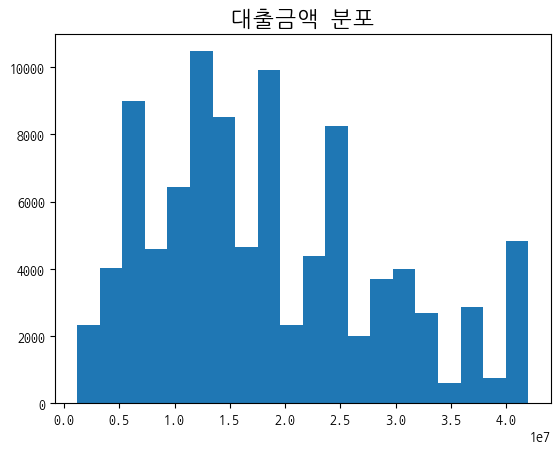

In [51]:
plt.hist(train['대출금액'], bins=20)
plt.title('대출금액 분포', fontsize=16)

In [52]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,대출등급_수치,대출목적_통합,근로기간_수치,부채_대비_소득_비율_구간,총계좌수_구간
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,2,부채 통합,6,15이상 20미만,10이상 20미만
1,TRAIN_00001,14400000,60 months,10 years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1,주택 개선,10,20이상 25미만,20이상 30미만
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0,부채 통합,5,5이상 10미만,10이상 20미만
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,2,부채 통합,8,15이상 20미만,10이상 20미만
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,1,그외,11,25이상 30미만,10이상 20미만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10 years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,2,신용 카드,10,5이상 10미만,30이상 40미만
96290,TRAIN_96290,28800000,60 months,10 years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,4,주택 개선,10,5이상 10미만,20이상 30미만
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,0,신용 카드,1,10이상 15미만,20이상 30미만
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,3,부채 통합,5,15이상 20미만,20이상 30미만


Text(0.5, 1.0, '연간소득 분포')

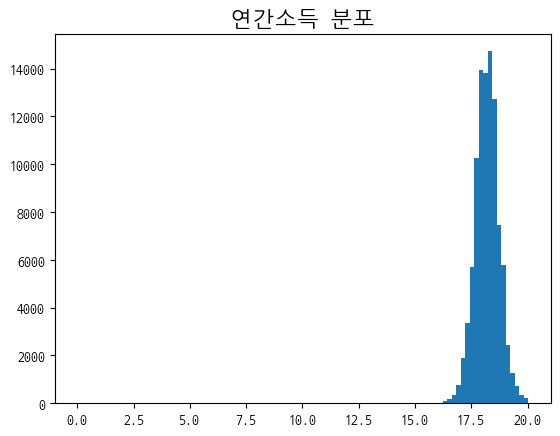

In [65]:
plt.hist(np.log1p(train[train['연간소득']<5e8]['연간소득']), bins=100)
plt.title('연간소득 분포', fontsize=16)

Text(0.5, 1.0, '총상환원금 분포')

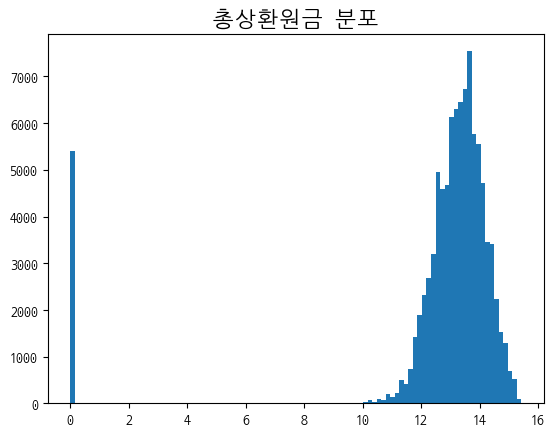

In [63]:
plt.hist(np.log1p(train[train['총상환원금']<5e6]['총상환원금']), bins=100)
plt.title('총상환원금 분포', fontsize=16)

Text(0.5, 1.0, '총상환이자 분포')

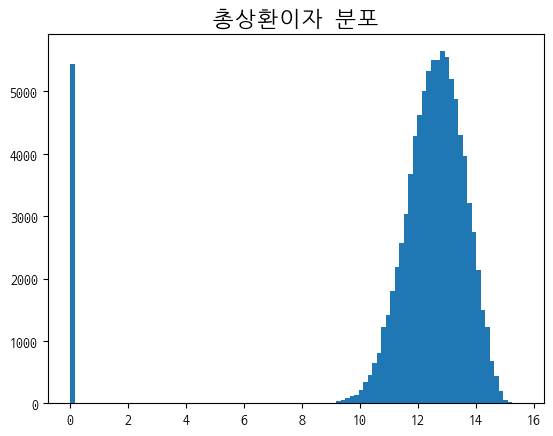

In [66]:
plt.hist(np.log1p(train['총상환이자']), bins=100)
plt.title('총상환이자 분포', fontsize=16)